# Attaching Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Data Collection

In [7]:
df = pd.read_csv("emails.csv")

In [8]:
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# Data Processing 

In [9]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [10]:
df.shape

(5172, 3002)

In [11]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [12]:
# import seaborn library
import seaborn as sns

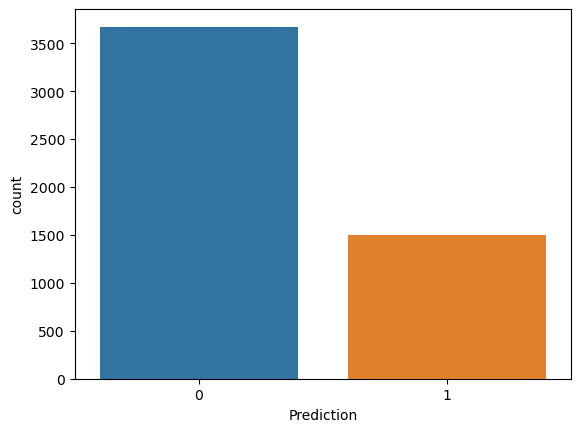

In [13]:
sns.countplot(data = df, x= 'Prediction')
plt.show()

In [14]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


# Training and Testing DataFrame

In [15]:
x = df.iloc[:,1:3001]
x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [16]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [17]:
from sklearn.metrics import f1_score, recall_score, roc_auc_score

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2)

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
mnb = MultinomialNB()

In [20]:
mnb.fit(train_x,train_y)

MultinomialNB()

In [21]:
mnb_pred = mnb.predict(x)
mnb_accuracy = accuracy_score(y,mnb_pred)

In [22]:
mnb_f1= f1_score(y,mnb_pred)
mnb_recall = recall_score(y,mnb_pred)
mnb_roc_auc = roc_auc_score(y, mnb_pred)

In [23]:
print(f"Accuracy of MultinomialNB model: {mnb_accuracy * 100:0.2f}%" )
print(f"f1- Score of MultinomialNB model: {mnb_f1:0.2f}" )
print(f"Recall Score of MultinomialNB model: {mnb_recall:0.2f}" )
print(f"ROC AUC Score of MultinomialNB model: {mnb_roc_auc:0.2f}" )

Accuracy of MultinomialNB model: 94.61%
f1- Score of MultinomialNB model: 0.91
Recall Score of MultinomialNB model: 0.95
ROC AUC Score of MultinomialNB model: 0.95


# Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB()

In [26]:
gnb.fit(train_x,train_y)

GaussianNB()

In [27]:
gnb_pred = gnb.predict(x)
gnb_accuracy = accuracy_score(y,gnb_pred)
gnb_f1= f1_score(y,gnb_pred)
gnb_recall = recall_score(y,gnb_pred)
gnb_roc_auc = roc_auc_score(y, gnb_pred)

In [28]:
print(f"Accuracy of GaussianNB model: {gnb_accuracy * 100:0.2f}%" )
print(f"f1- Score of GaussianNB model: {gnb_f1:0.2f}" )
print(f"Recall Score of GaussianNB model: {gnb_recall:0.2f}" )
print(f"ROC AUC Score of GaussianNB model: {gnb_roc_auc:0.2f}" )

Accuracy of GaussianNB model: 96.11%
f1- Score of GaussianNB model: 0.94
Recall Score of GaussianNB model: 0.99
ROC AUC Score of GaussianNB model: 0.97


# Bernoulli Naive Bayes

In [29]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(train_x,train_y)

BernoulliNB()

In [30]:
bnb_pred = bnb.predict(x)
bnb_accuracy = accuracy_score(y,bnb_pred)
bnb_f1= f1_score(y,gnb_pred)
bnb_recall = recall_score(y,bnb_pred)
bnb_roc_auc = roc_auc_score(y, bnb_pred)


print(f"Accuracy of BernoulliNB model: {bnb_accuracy * 100:0.2f}%" )
print(f"f1- Score of BernoulliNB model: {bnb_f1:0.2f}" )
print(f"Recall Score of BernoulliNB model: {bnb_recall:0.2f}" )
print(f"ROC AUC Score of BernoulliNB model: {bnb_roc_auc:0.2f}" )

Accuracy of BernoulliNB model: 87.45%
f1- Score of BernoulliNB model: 0.94
Recall Score of BernoulliNB model: 0.75
ROC AUC Score of BernoulliNB model: 0.84


# Logistic Regression

In [31]:
lreg = LogisticRegression()

In [32]:
lreg.fit(train_x,train_y)

C:\Users\Red Devil\anaconda3.4\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
lreg_pred = lreg.predict(x)
lreg_accuracy = accuracy_score(y,lreg_pred)
lreg_f1= f1_score(y,lreg_pred)
lreg_recall = recall_score(y,lreg_pred)
lreg_roc_auc = roc_auc_score(y,lreg_pred)


print(f"Accuracy of LogisticRegression model: {lreg_accuracy * 100:0.2f}%" )
print(f"f1- Score of LogisticRegression model: {lreg_f1:0.2f}" )
print(f"Recall Score of LogisticRegression model: {lreg_recall:0.2f}" )
print(f"ROC AUC Score of LogisticRegression model: {lreg_roc_auc:0.2f}" )

Accuracy of LogisticRegression model: 98.11%
f1- Score of LogisticRegression model: 0.97
Recall Score of LogisticRegression model: 0.97
ROC AUC Score of LogisticRegression model: 0.98


# Model Comparision

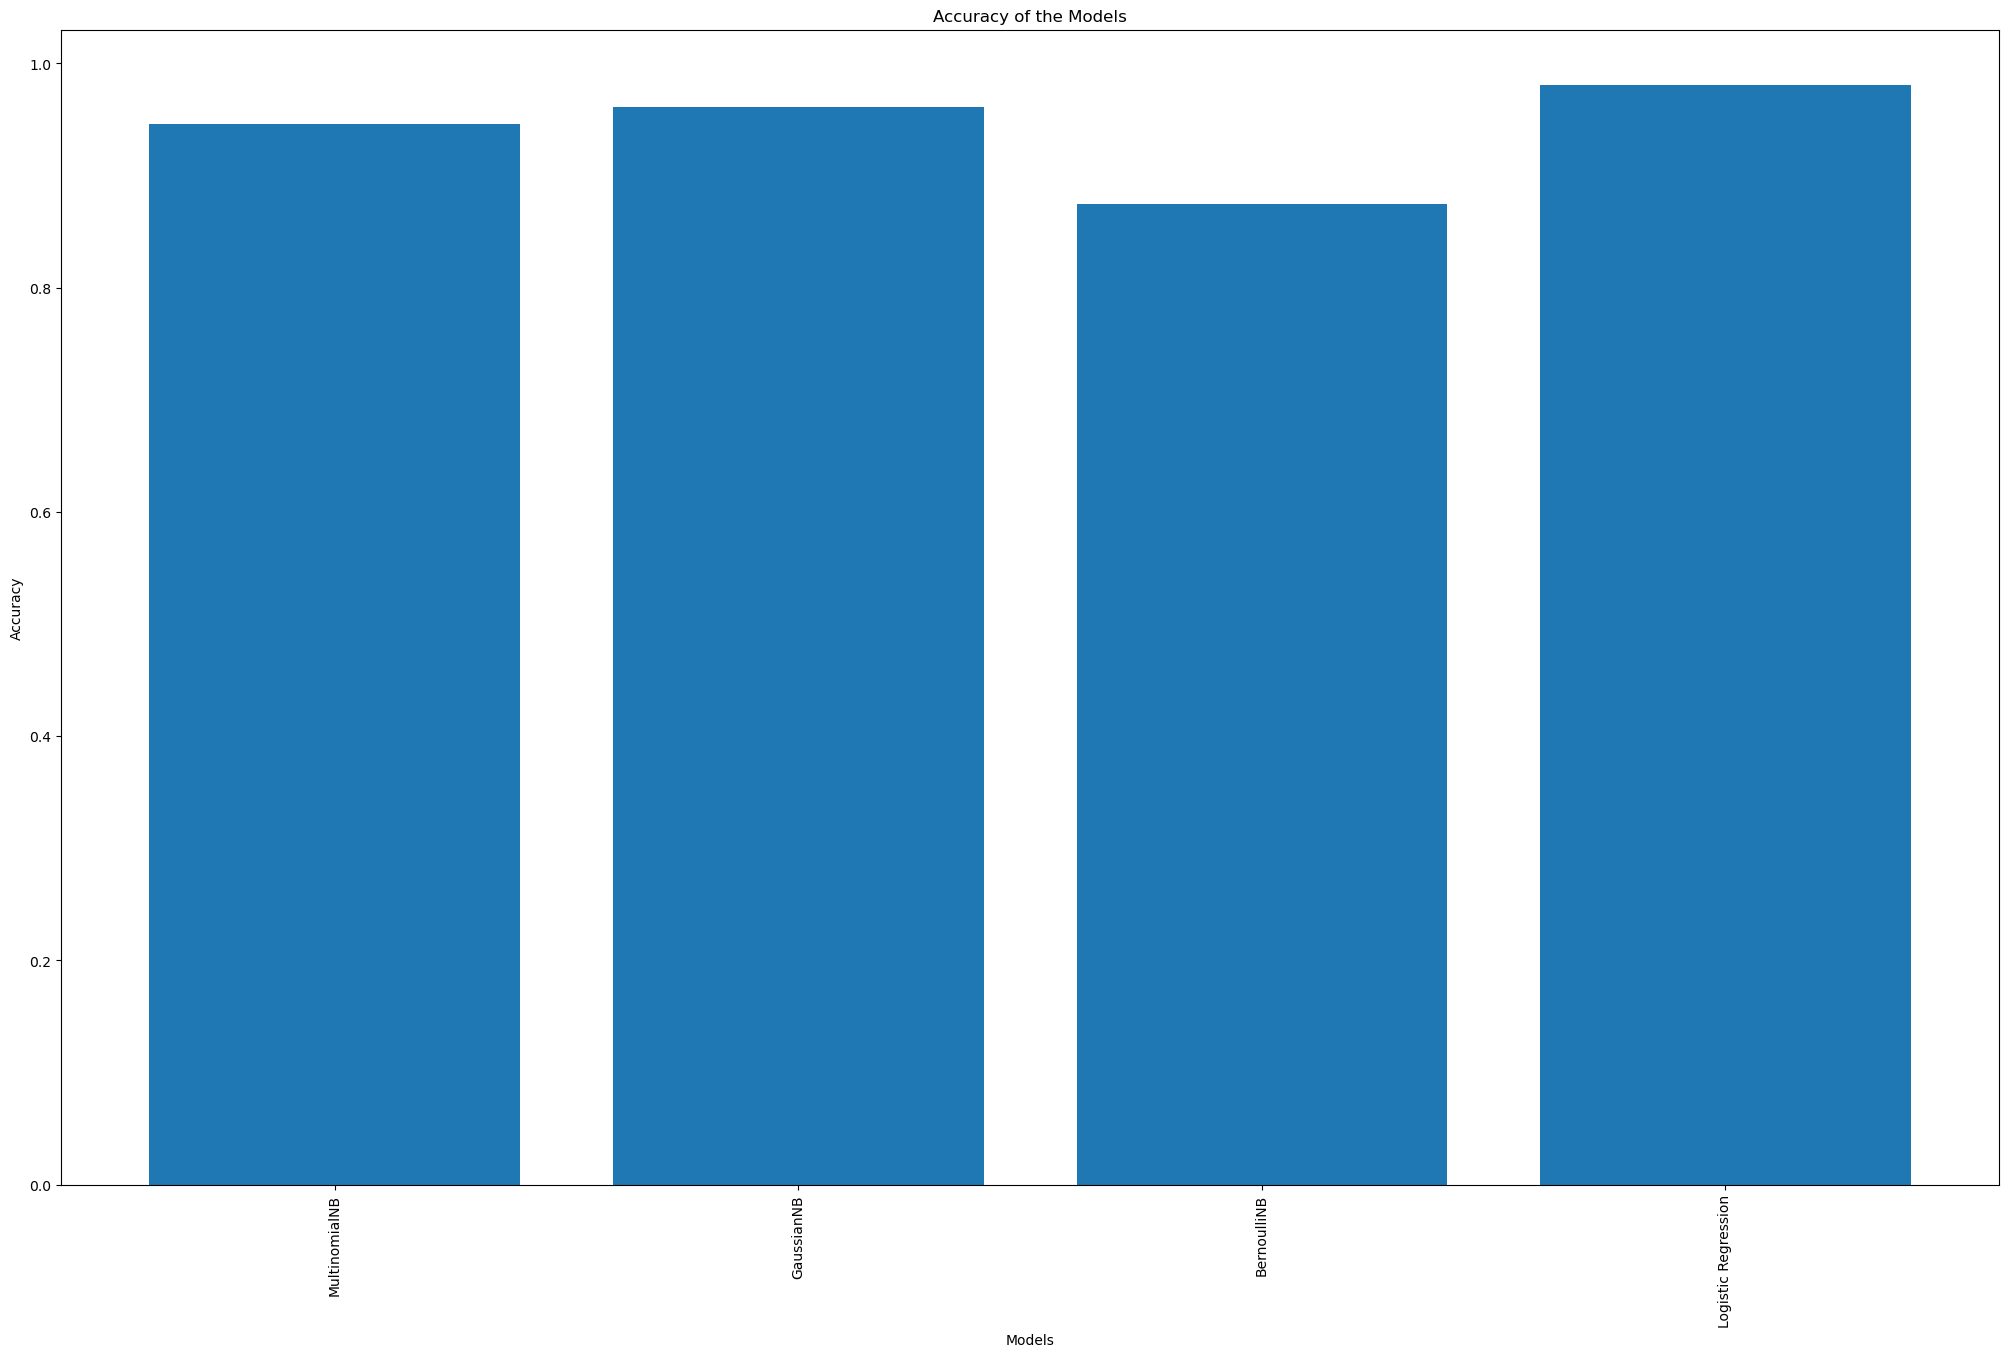

In [34]:
accuracy = [mnb_accuracy, gnb_accuracy, bnb_accuracy, lreg_accuracy]
f1_score = [mnb_f1, gnb_f1, bnb_f1, lreg_f1]
recall = [mnb_recall, gnb_recall, bnb_recall, lreg_recall]
roc_auc = [mnb_roc_auc, gnb_roc_auc, bnb_roc_auc, lreg_roc_auc]

models = ["MultinomialNB", "GaussianNB", "BernoulliNB", "Logistic Regression"]

plt.figure(figsize = (25,15))
plt.bar(models, accuracy)
plt.xticks(rotation = 90)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of the Models")
plt.show()

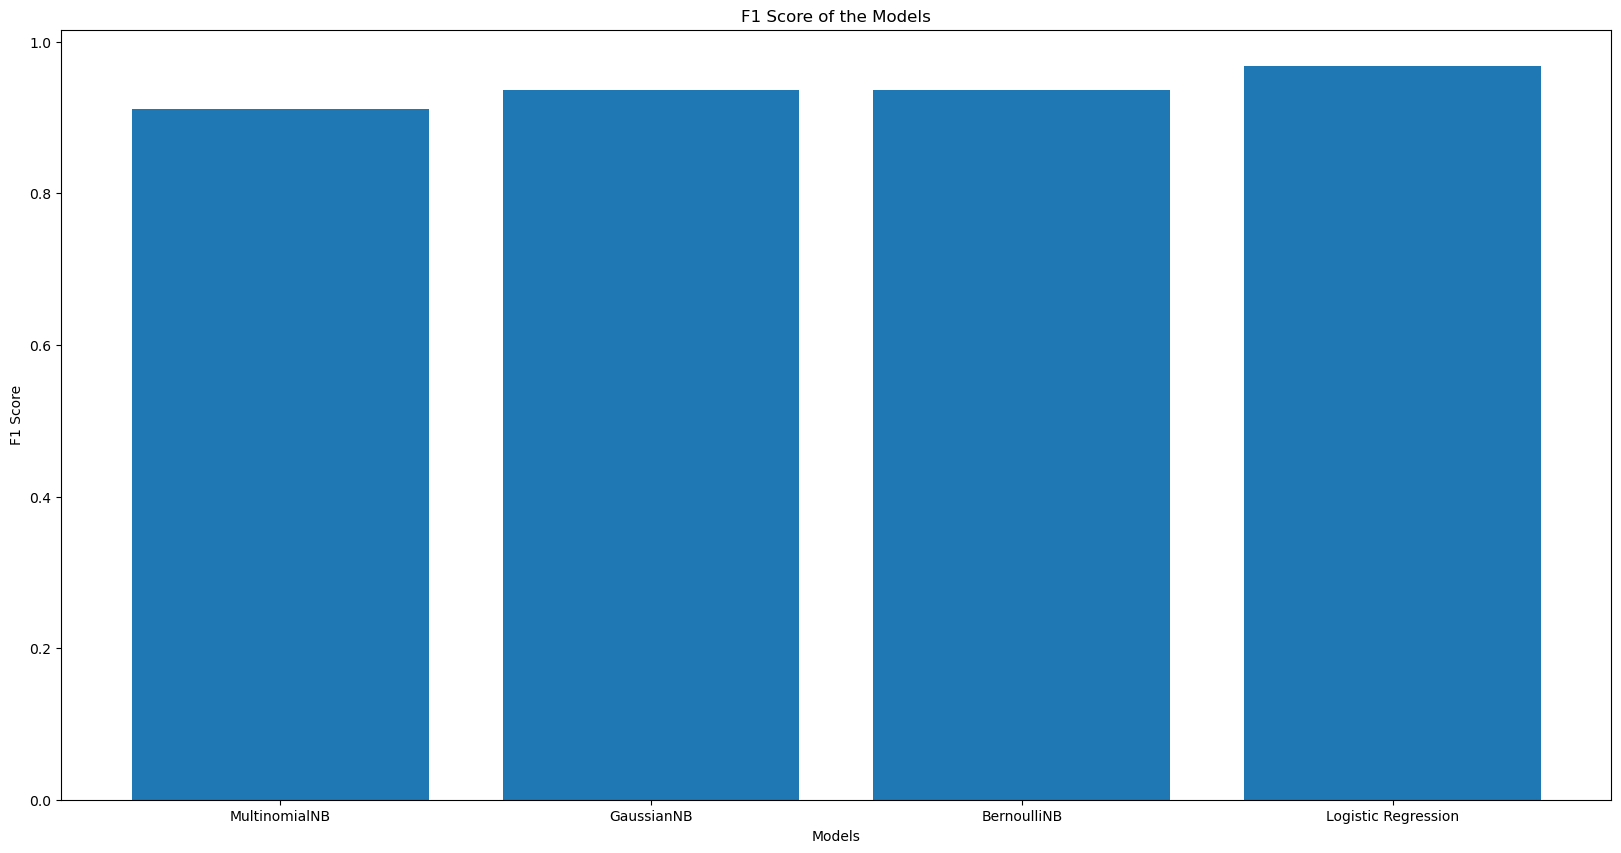

In [35]:
plt.figure(figsize = (20,10))
plt.bar(models, f1_score)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Score of the Models")
plt.show()

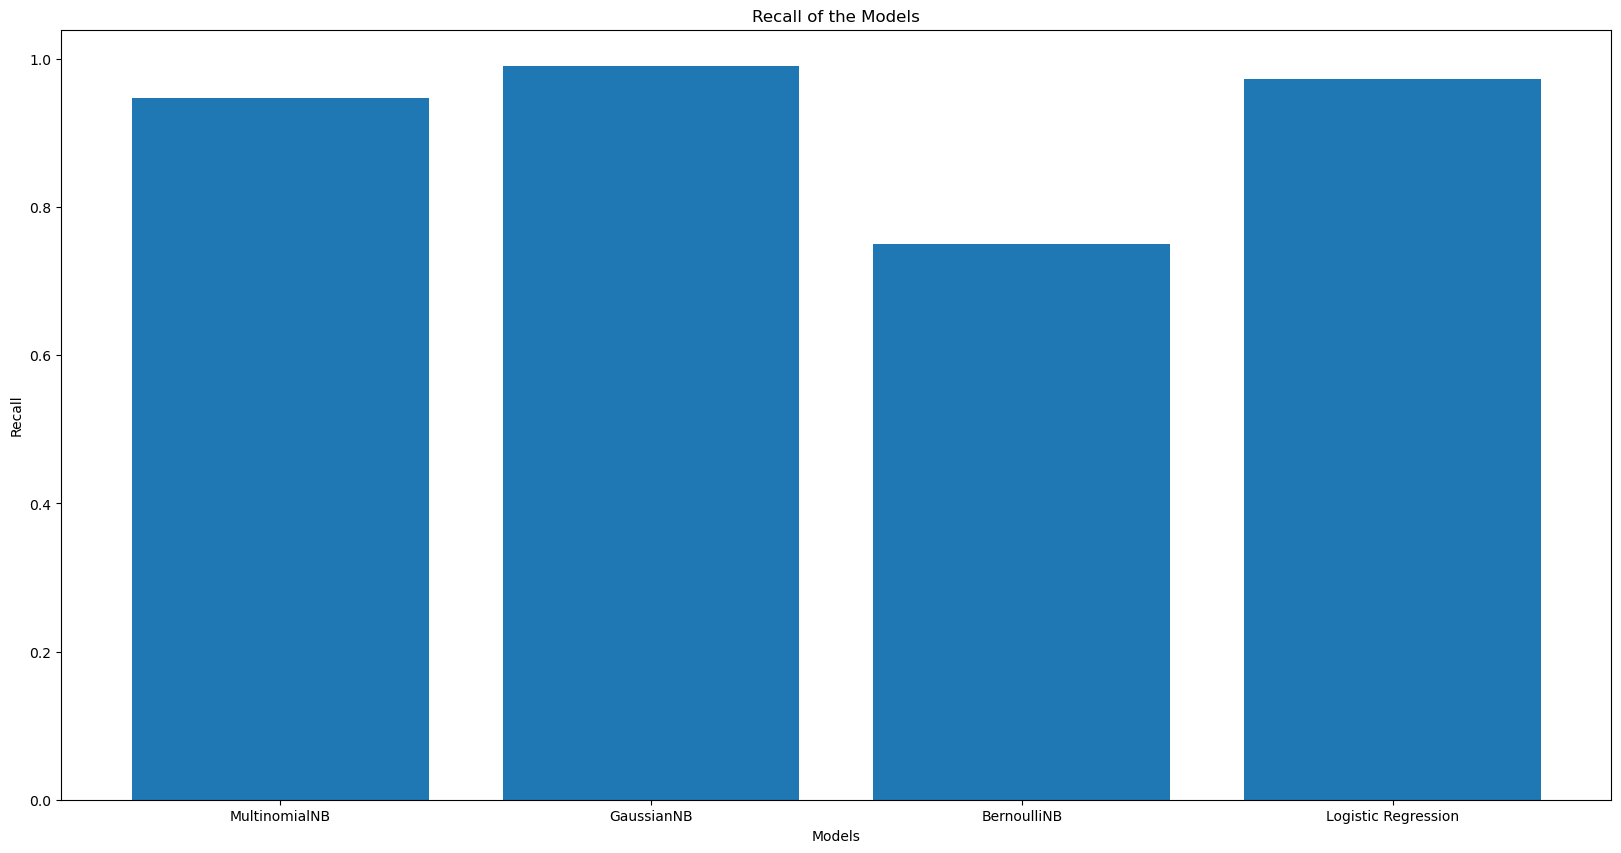

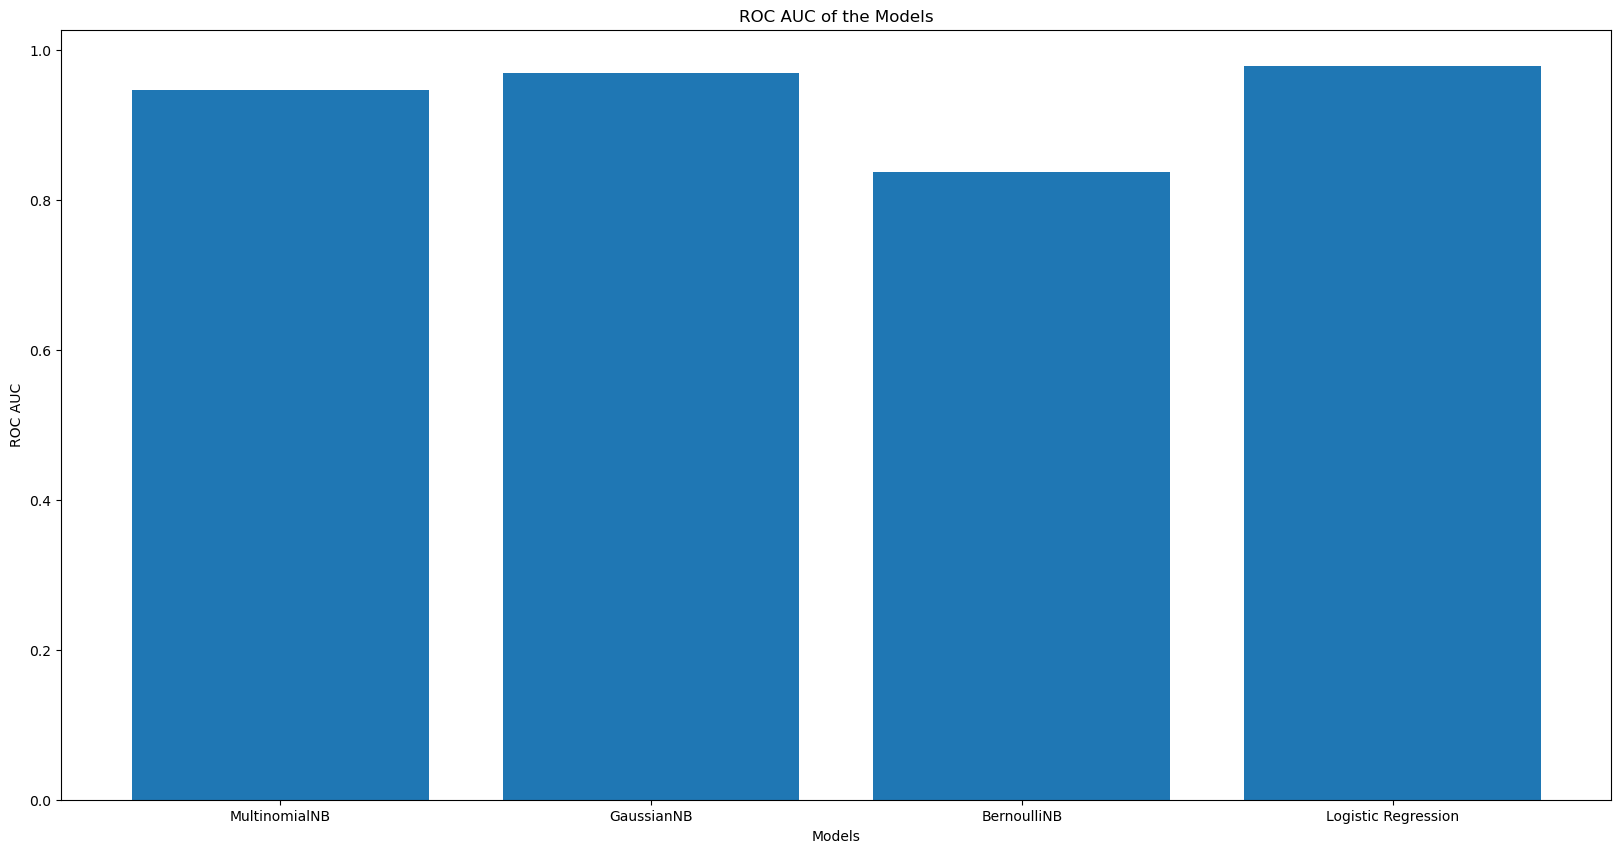

In [36]:
plt.figure(figsize = (20,10))
plt.bar(models, recall)
plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Recall of the Models")
plt.show()


plt.figure(figsize = (20,10))
plt.bar(models, roc_auc)
plt.xlabel("Models")
plt.ylabel("ROC AUC")
plt.title("ROC AUC of the Models")
plt.show()

# DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dlf = DecisionTreeClassifier()

In [39]:
dlf.fit(train_x,train_y)

DecisionTreeClassifier()

In [42]:
dlf_pred = dlf.predict(x)
dlf.score(train_x,train_y)


1.0

In [43]:
dlf.score(test_x,test_y)

0.9217391304347826

In [44]:
dlf_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [46]:
dlf.predict(test_x)

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)